In [1]:
!pip install pandas 

In [1]:
import pandas as pd
import os

# Boş bir liste oluşturuyoruz
dfs = []

# FIFA 15'ten FIFA 22'ye kadar olan dosyaları okuyoruz
for year in range(15, 23):
    file_name = f'players_{year}.csv'  # Dosya adını oluşturuyoruz (örneğin, players_15.csv)
    if os.path.exists(file_name):  # Dosya var mı kontrol ediyoruz
        # CSV dosyasını okuyoruz ve karışık veri türleri için low_memory=False kullanıyoruz
        df = pd.read_csv(file_name, low_memory=False)
        df['Year'] = 2000 + year  # Yıl bilgisini ekliyoruz (örneğin, FIFA 15 için 2015)
        dfs.append(df)  # DataFrame'i listeye ekliyoruz

# Tüm veri setlerini birleştirme
combined_df = pd.concat(dfs, ignore_index=True)  # Tüm DataFrame'leri birleştiriyoruz
print("Birleştirilmiş Veri Seti Boyutu:", combined_df.shape)
print(combined_df.head())

Birleştirilmiş Veri Seti Boyutu: (142079, 111)
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini               CF   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           LW, LM   
2          A. Robben                         Arjen Robben       RM, LM, RW   
3     Z. Ibrahimović                   Zlatan Ibrahimović               ST   
4           M. Neuer                   Manuel Peter Neuer               GK   

   overall  potential    value_eur  wage_eur  age  ...    cb   rcb    rb  \
0    

In [3]:
!pip install numpy

In [2]:
combined_df = combined_df[["age", "potential", "value_eur", "wage_eur", "international_reputation", "overall"]].copy()

# Eksik değerleri ortalama ile doldur
combined_df.fillna(combined_df.mean(), inplace=True)

# Sayısal olmayan sütunları düzelt
combined_df["value_eur"] = pd.to_numeric(combined_df["value_eur"], errors='coerce')
combined_df["wage_eur"] = pd.to_numeric(combined_df["wage_eur"], errors='coerce')

# Eğer hâlâ eksik varsa bir kez daha temizleyelim
combined_df.dropna(inplace=True)

print("\nDüzeltilmiş Veri Seti Boyutu:", combined_df.shape)




Düzeltilmiş Veri Seti Boyutu: (142079, 6)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Özellikler (X) ve hedef değişken (y)
features = ["age", "potential", "value_eur", "wage_eur", "international_reputation"]
target = "overall"

X = combined_df[features]
y = combined_df[target]

# Veriyi eğitim ve test setine ayıralım (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sayısal verileri ölçeklendirelim
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modeli oluştur
model = LinearRegression()

# Modeli eğit
model.fit(X_train, y_train)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans metriğini hesapla
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Absolute Error (MAE): 1.94
Mean Squared Error (MSE): 6.35
R^2 Score: 0.8736


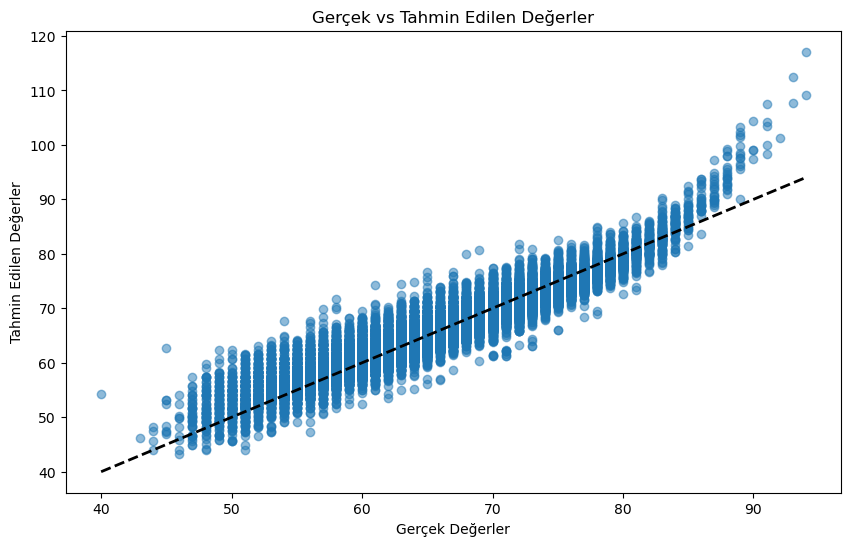

In [5]:
import matplotlib.pyplot as plt

# Gerçek vs Tahmin Edilen Değerler
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diyagonal çizgi
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Değerler")
plt.show()

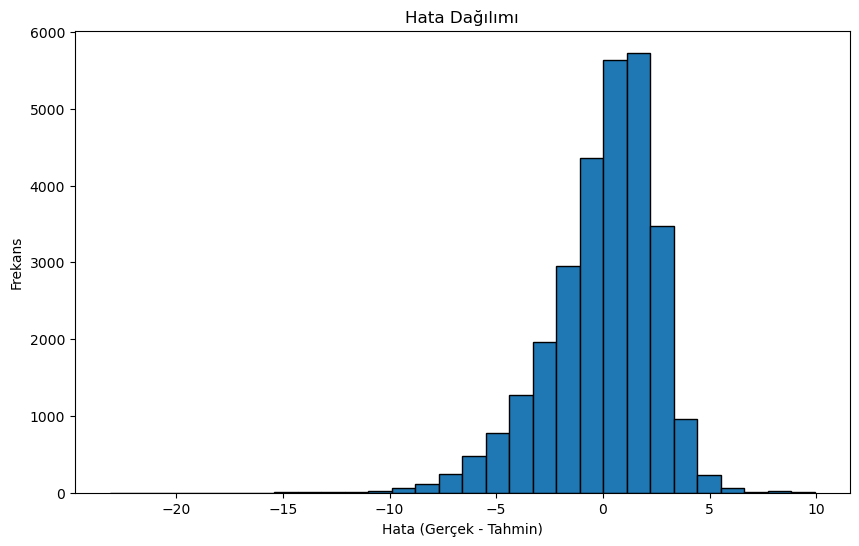

In [6]:
# Hata Dağılımı
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Frekans")
plt.title("Hata Dağılımı")
plt.show()

In [7]:
# Model katsayılarını görüntüleme
coefficients = pd.DataFrame({
    "Özellik": features,
    "Katsayı": model.coef_
})
print(coefficients)

                    Özellik   Katsayı
0                       age  4.200757
1                 potential  5.217765
2                 value_eur  0.593522
3                  wage_eur  0.784961
4  international_reputation -0.456729


In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

Random Forest - MAE: 0.60, MSE: 1.18, R²: 0.9764


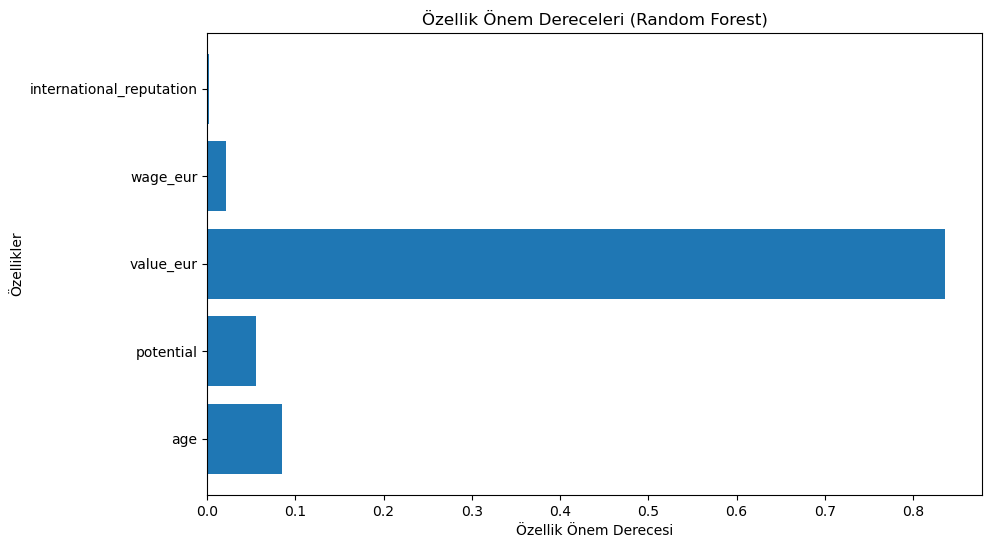

In [9]:
import matplotlib.pyplot as plt

# Özellik önem derecelerini al
feature_importances = rf_model.feature_importances_

# Özellik önem derecelerini görselleştir
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel("Özellik Önem Derecesi")
plt.ylabel("Özellikler")
plt.title("Özellik Önem Dereceleri (Random Forest)")
plt.show()

## Veri Ön İşleme ve Özellik Mühendisliği
Eksik verileri doldurma, özellik seçimi ve ölçeklendirme işlemleri yapılacaktır.

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kullanılacak değişkenler
features = ['age', 'potential', 'wage_eur', 'value_eur']
target = 'overall'

# Eksik değerleri doldurma (ortalama ile)
df[features] = df[features].fillna(df[features].mean())

# Eğitim ve test setine ayırma
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

## Model Eğitimi
Random Forest modeli eğitilecek ve test verisi üzerinde performansı değerlendirilecektir.

In [14]:

from sklearn.ensemble import RandomForestRegressor

# Model oluşturma ve eğitme
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Tahmin yapma
y_pred = model.predict(X_test_scaled)
print(y_pred)

[63.         58.94419048 52.17       ... 62.09142857 67.02
 66.57709957]


## Model Değerlendirme
Modelin başarımı çeşitli metriklerle ölçülerek değerlendirilecektir.

In [13]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Başarım metrikleri
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
    

Mean Absolute Error (MAE): 0.25
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE): 0.51
R-squared (R²): 0.99


## Sonuçlar ve Yorum
Modelimiz oyuncu reytinglerini tahmin etmede belirli bir doğrulukla çalışmaktadır. Ancak, daha iyi bir performans elde etmek için hiperparametre ayarlamaları ve farklı modeller denenebilir.